<a href="https://colab.research.google.com/github/RitikaShetty2004/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

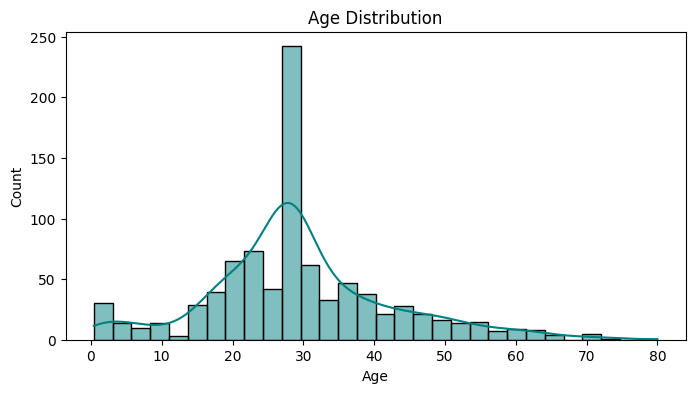

/tmp/ipython-input-3847656801.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


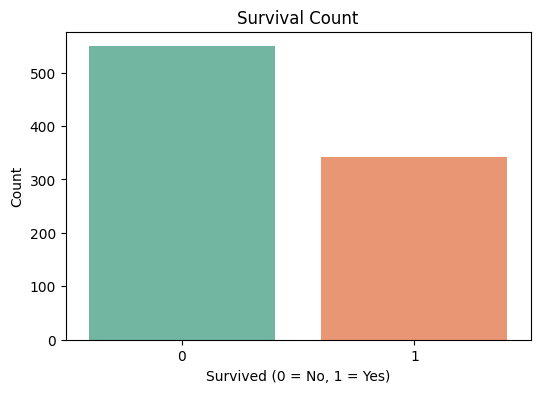

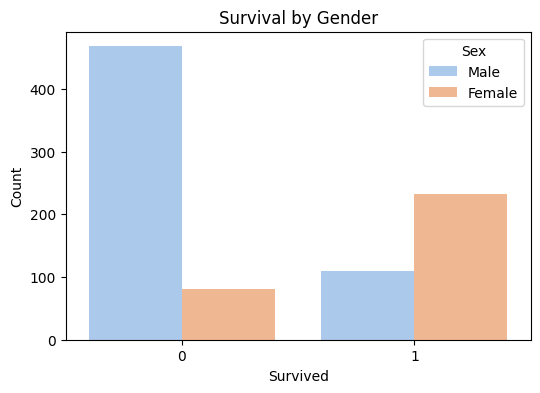

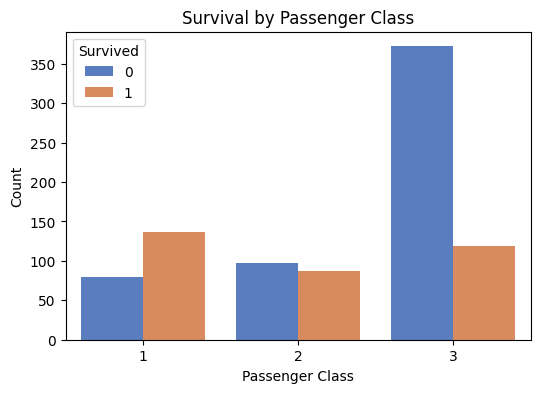

/tmp/ipython-input-3847656801.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')


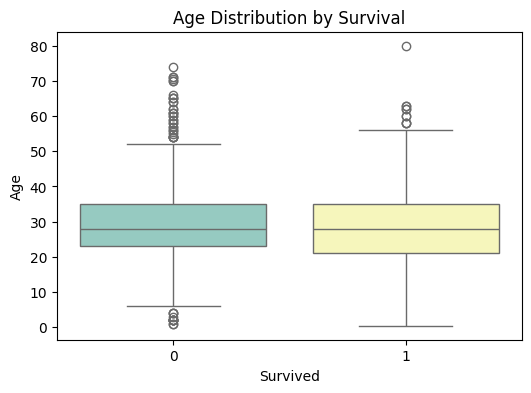

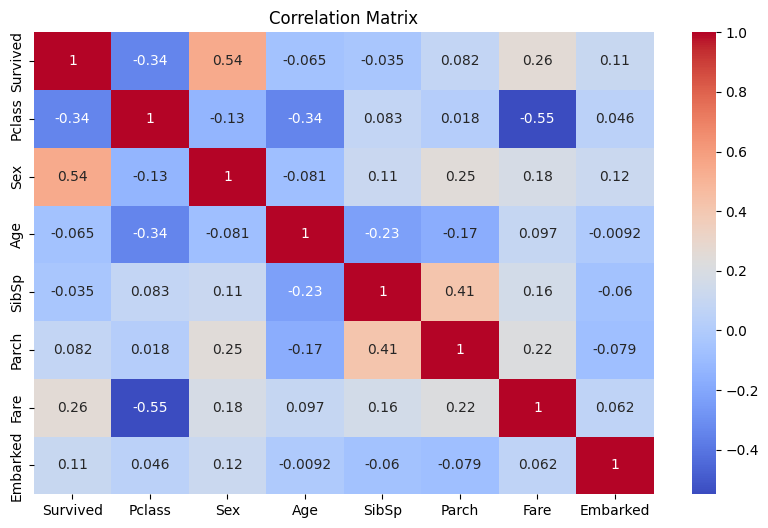

Survival Rate by Sex:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64 

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Average Age by Survival Status:
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.drop(columns='Cabin', inplace=True)

median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

df_corr = df.drop(columns=['Name', 'Ticket', 'PassengerId'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print("Survival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean(), "\n")

print("Survival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean(), "\n")

print("Average Age by Survival Status:")
print(df.groupby('Survived')['Age'].mean())
